# FairFace Dataset Preparation

This dataset is organized as follows:

```text
FairFace:
|---labels
|----|------------fairface_label_train.csv
|----|------------fairface_label_test.csv
|---margin 0.25
|----|------------train
|----|------------val

Data source: https://github.com/dchen236/FairFace?tab=readme-ov-file

The dataset will be reorganized into an Images folder and a labels.csv file.

In [1]:
import numpy as np, pandas as pd, shutil, matplotlib.pyplot as plt, os
import PIL.Image as Image
os.chdir('..')

In [2]:
output_dir = os.path.join('data', 'datasets', 'age gender and race estimation', 'FairFace')
os.path.exists(output_dir)

True

In [3]:
new_images_path = os.path.join(output_dir, 'Images')
os.makedirs(new_images_path, exist_ok = True)

In [4]:
train_df = pd.read_csv(os.path.join(output_dir, 'labels', 'fairface_label_train.csv'))
train_df['split'] = 'train'
val_df = pd.read_csv(os.path.join(output_dir, 'labels', 'fairface_label_val.csv'))
val_df['split'] = 'test'

In [5]:
train_df.head()

,file,age,gender,race,service_test,split
0,train/1.jpg,50-59,Male,East Asian,True,train
1,train/2.jpg,30-39,Female,Indian,False,train
2,train/3.jpg,3-9,Female,Black,False,train
3,train/4.jpg,20-29,Female,Indian,True,train
4,train/5.jpg,20-29,Female,Indian,True,train


In [6]:
combined_df = pd.concat((train_df, val_df), ignore_index = True)
combined_df

,file,age,gender,race,service_test,split
0,train/1.jpg,50-59,Male,East Asian,True,train
1,train/2.jpg,30-39,Female,Indian,False,train
2,train/3.jpg,3-9,Female,Black,False,train
3,train/4.jpg,20-29,Female,Indian,True,train
4,train/5.jpg,20-29,Female,Indian,True,train
...,...,...,...,...,...,...
97693,val/10950.jpg,30-39,Male,White,True,test
97694,val/10951.jpg,50-59,Male,White,False,test
97695,val/10952.jpg,60-69,Male,Latino_Hispanic,False,test
97696,val/10953.jpg,20-29,Female,East Asian,False,test


In [7]:
combined_df['race'].unique()

array(['East Asian', 'Indian', 'Black', 'White', 'Middle Eastern',
       'Latino_Hispanic', 'Southeast Asian'], dtype=object)

In [8]:
race_4_translation = {
    'White' : 0,
    'Black' : 1,
    'East Asian' : 2,
    'Southeast Asian' : 2,
    'Indian' : 3,
    'Latino_Hispanic' : 4,
    'Middle Eastern' : 4
}

In [9]:
race_translation = {
    'White' : 0,
    'Black' : 1,
    'East Asian' : 2,
    'Southeast Asian' : 3,
    'Indian' : 4,
    'Latino_Hispanic' : 5,
    'Middle Eastern' :6
}

In [10]:
gender_translation = {
    'Male' : 1,
    'Female' : 0
}

In [11]:
new_filenames = []
race_4 = []
race_original = []
age_ranges = []
genders = []
for i in range(len(combined_df)):
    old_image_path = os.path.join(output_dir, 'margin 0.25', combined_df['file'].iloc[i])
    new_filename = f'{i}.jpg'
    new_filenames.append(new_filename)
    new_image_path = os.path.join(new_images_path, new_filename)
    
    image = Image.open(old_image_path)
    image.resize(size = (112, 112)).save(new_image_path)
    
    original_race = combined_df['race'].iloc[i]
    race_original.append(race_translation[original_race])
    race_4.append(race_4_translation[original_race])
    
    age_ranges.append(combined_df['age'].iloc[i])
    genders.append(gender_translation[combined_df['gender'].iloc[i]])




In [12]:
inverse_race_4_translation = {
    0 : 'White',
    1 : 'Black',
    2 : 'Asian',
    3 : 'Indian',
    4 : 'Other'
}

inverse_race_original_translation = {value : key for key, value in race_translation.items()}
inverse_race_original_translation

{0: 'White',
 1: 'Black',
 2: 'East Asian',
 3: 'Southeast Asian',
 4: 'Indian',
 5: 'Latino_Hispanic',
 6: 'Middle Eastern'}

In [13]:
labels_df = pd.DataFrame(
    data = {
        'filename' : new_filenames,
        'gender' : genders,
        'age range' : age_ranges ,
        'race' : race_4,
        'race translated' : [inverse_race_4_translation[i] for i in race_4],
        'race original' : race_original,
        'race original translated' : [inverse_race_original_translation[i] for i in race_original]
    }
)

In [14]:
labels_df.head(20)

,filename,gender,age range,race,race translated,race original,race original translated
0,0.jpg,1,50-59,2,Asian,2,East Asian
1,1.jpg,0,30-39,3,Indian,4,Indian
2,2.jpg,0,3-9,1,Black,1,Black
3,3.jpg,0,20-29,3,Indian,4,Indian
4,4.jpg,0,20-29,3,Indian,4,Indian
5,5.jpg,1,20-29,0,White,0,White
6,6.jpg,1,40-49,4,Other,6,Middle Eastern
7,7.jpg,0,30-39,3,Indian,4,Indian
8,8.jpg,1,10-19,0,White,0,White
9,9.jpg,1,30-39,4,Other,6,Middle Eastern


In [15]:
labels_df.to_csv(os.path.join(output_dir, 'labels.csv'), index = False)

# EDA

In [16]:
labels_df = pd.read_csv(os.path.join(output_dir, 'labels.csv'))

In [17]:
genders, counts = np.unique(labels_df['gender'], return_counts = True)

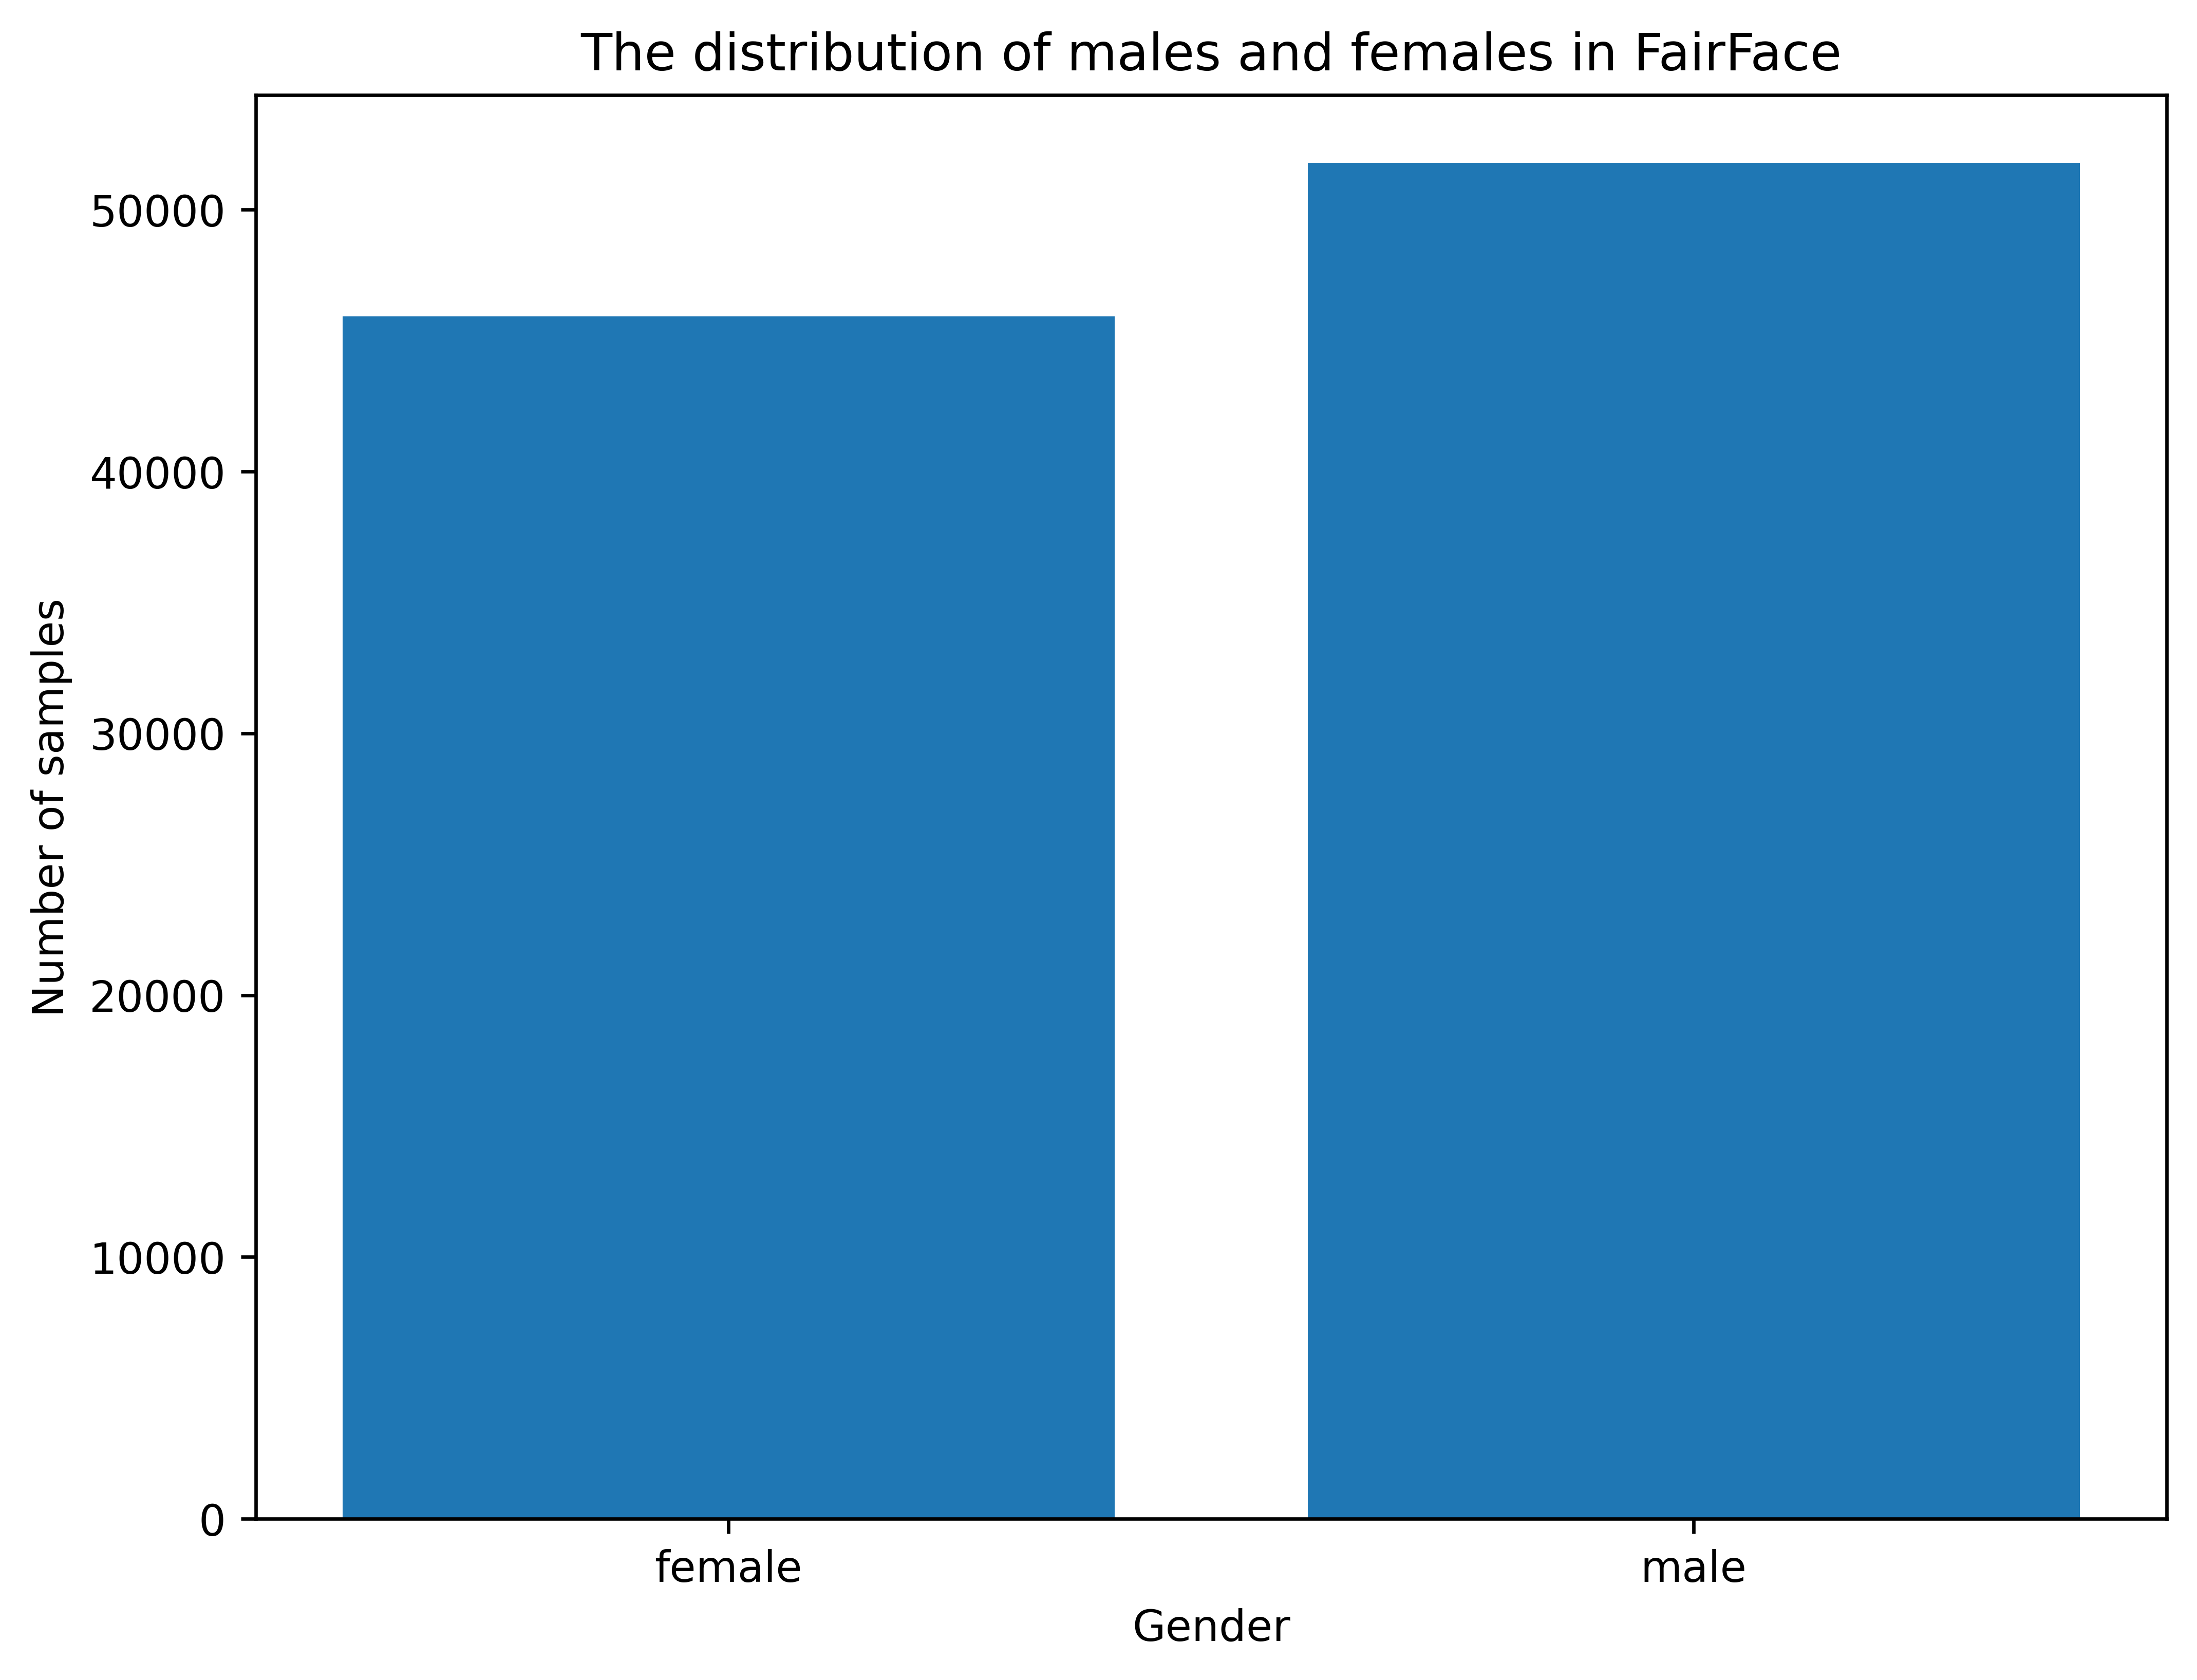

In [18]:
plt.figure(figsize = (8, 6), dpi = 600)
plt.bar(x = ['female', 'male'], height = counts)
plt.title('The distribution of males and females in FairFace')
plt.xlabel('Gender')
plt.ylabel('Number of samples')
plt.savefig(
    os.path.join('data', 'figures', 'Age Gender Race', 'FairFace', 'The distribution of males and females in FairFace')
)
plt.show()

In [19]:
races, counts = np.unique(labels_df['race'], return_counts = True)
sorted_idx = np.argsort(counts)[::-1]
races = races[sorted_idx]
counts = counts[sorted_idx]

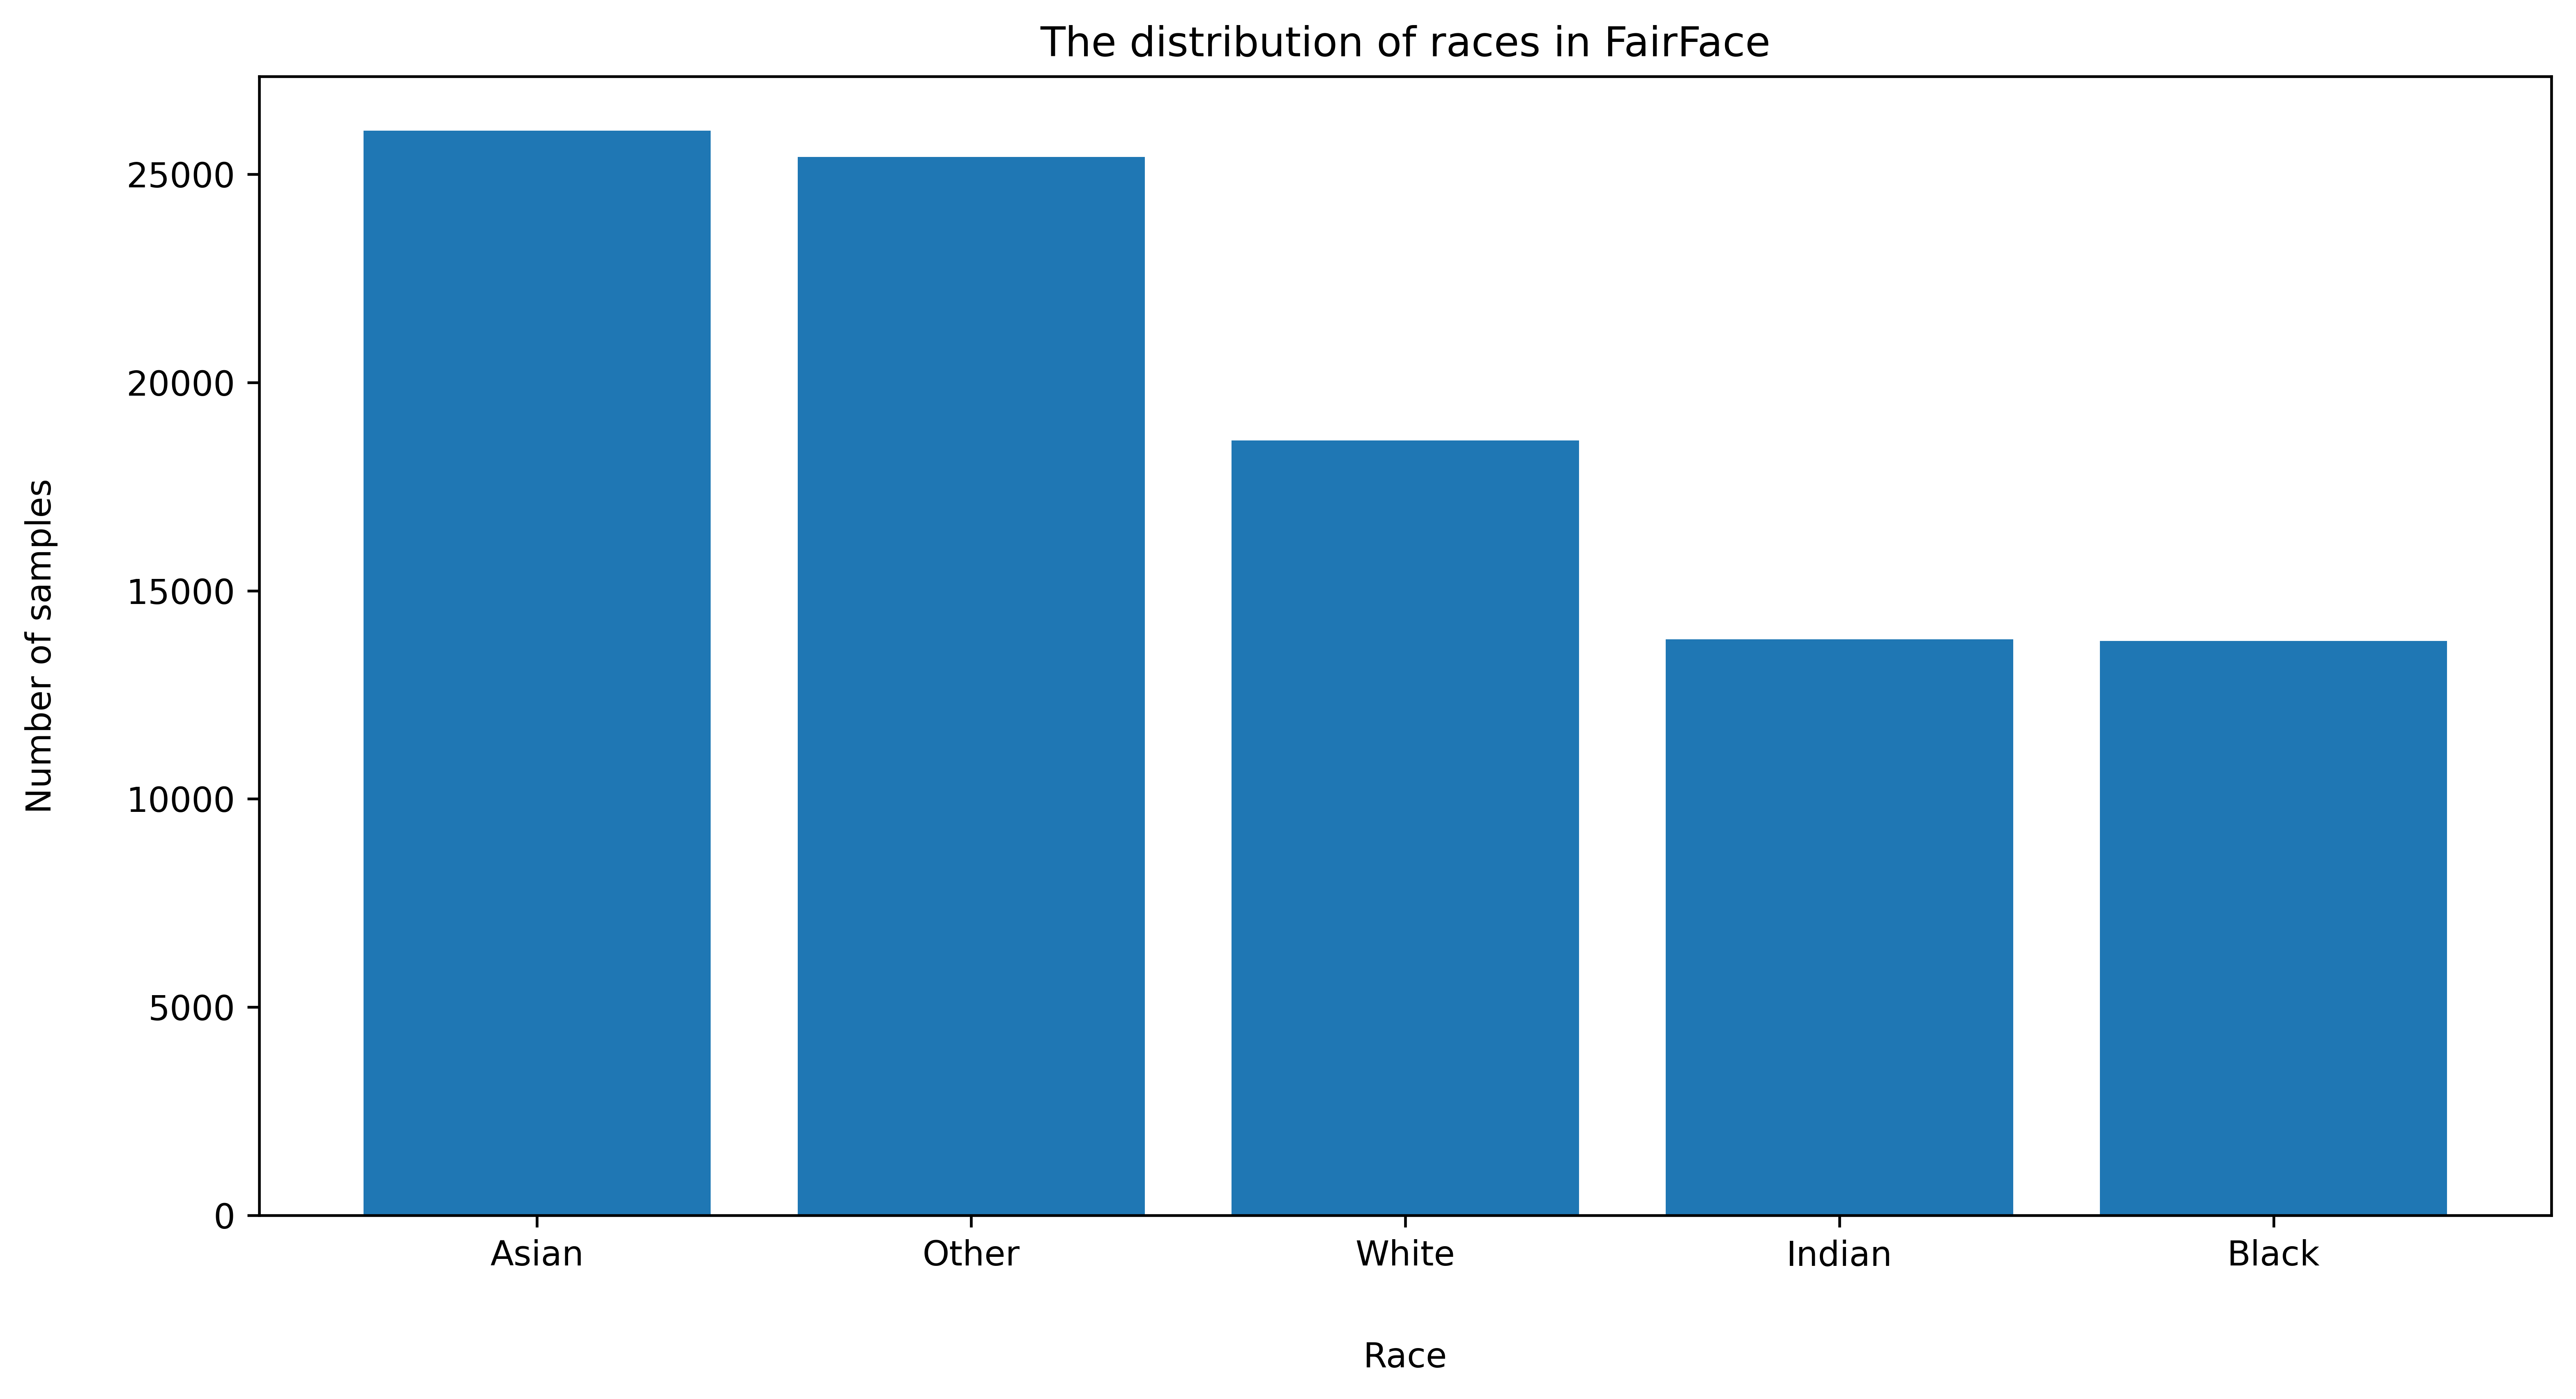

In [20]:
plt.figure(figsize = (12, 6), dpi = 600)
plt.bar(x = [inverse_race_4_translation[i] for i in races], height = counts)
plt.title('The distribution of races in FairFace')
plt.xlabel('Race', labelpad = 20)
plt.ylabel('Number of samples', labelpad = 20)
plt.savefig(
    os.path.join('data', 'figures', 'Age Gender Race', 'FairFace', 'The distribution races in FairFace')
)
plt.show()

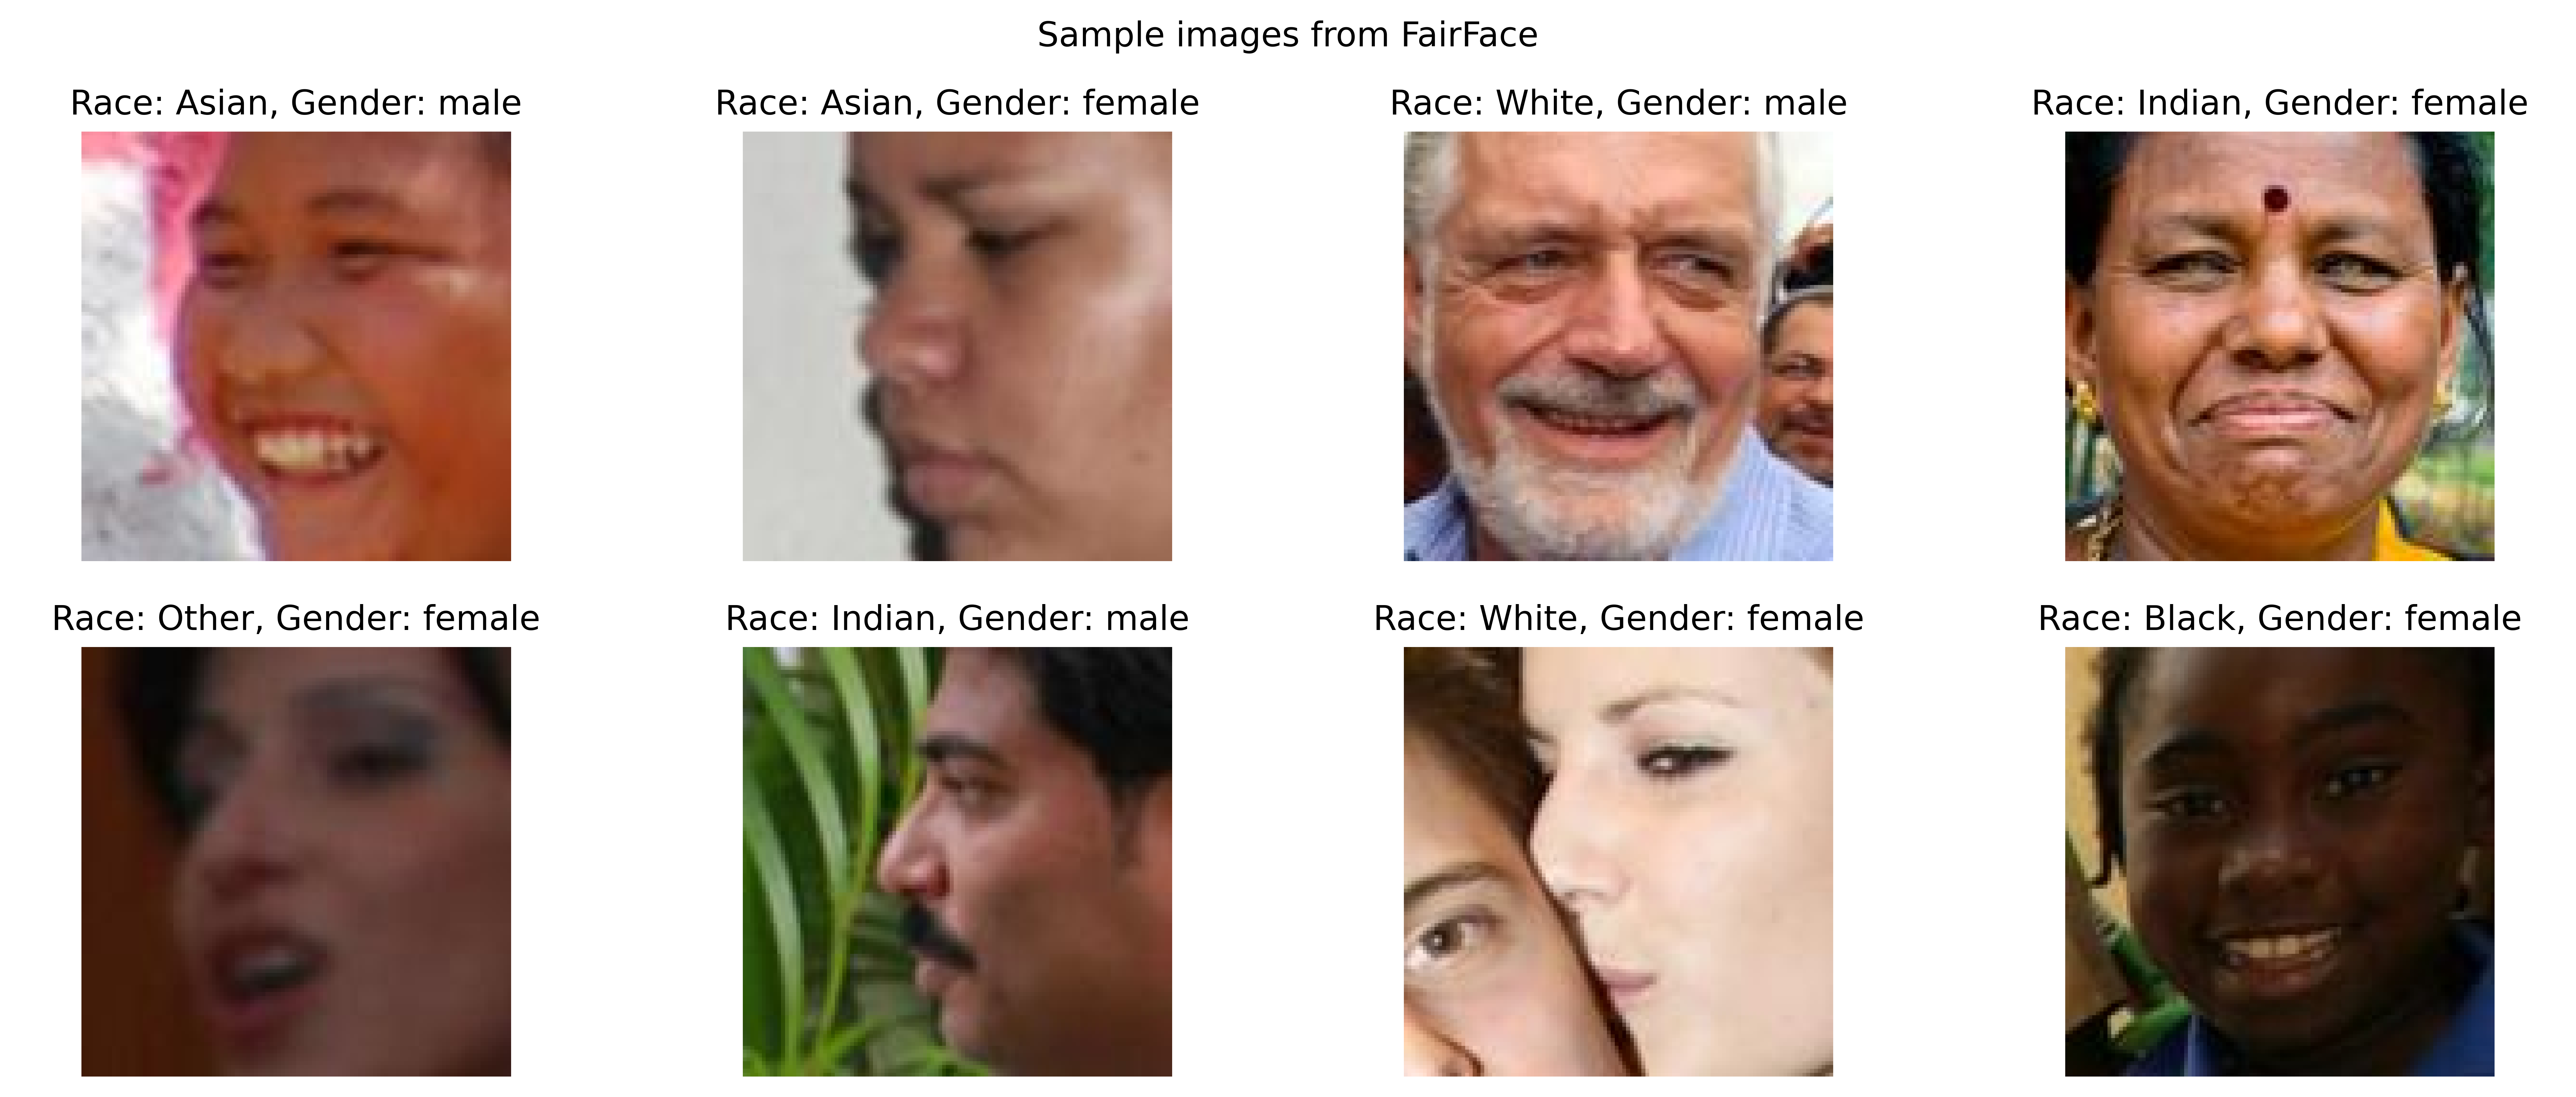

In [21]:
plt.figure(figsize = (16,6), dpi = 600)
plt.title('Sample images from FairFace', pad = 30)
plt.axis('off')
for i in range(8):
    idx = np.random.randint(low = 0, high = len(labels_df))
    image = plt.imread(os.path.join(output_dir, 'Images', labels_df['filename'][idx]))
    race = labels_df['race translated'][idx]
    gender = labels_df['gender'][idx]
    plt.subplot(2, 4, i+1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f'Race: {race}, Gender: {'male' if gender else 'female'}')
plt.savefig(
        os.path.join('data', 'figures', 'Age Gender Race', 'FairFace', 'Sample images from FairFace')
)
plt.show()